<a href="https://colab.research.google.com/github/K7S3/GPCR_ML_Residue_Importance/blob/main/JCIM_V2_Correlation_Feature_Importance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feature Importance/Selection Methods


##Dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn import preprocessing
data_in = pd.read_csv("drive/MyDrive/dataset_new.csv", delimiter=',', encoding="utf-8-sig")

cols=data_in.columns
cols = cols.astype(str).str.replace(r"[\[\]']", '')
print(cols)
data_in.columns=cols

data_in.round(2).head().T.head(15).T

Index(['Distance', 'Rotation', 'Delta1', 'Delta2', 'Delta3', 'ALE-230EELEC',
       'ALE-230EVDW', 'ALE-234EELEC', 'ALE-234EVDW', 'ALE-257EELEC',
       ...
       'ALE-430EELEC', 'ALE-430EVDW', 'ALE-431EELEC', 'ALE-431EVDW',
       'ALE-432EELEC', 'ALE-432EVDW', 'ALE-433EELEC', 'ALE-433EVDW',
       'ALE-435EELEC', 'ALE-435EVDW'],
      dtype='object', length=147)


<ipython-input-2-0eb150202e14>:8: FutureWarning: The default value of regex will change from True to False in a future version.
  cols = cols.astype(str).str.replace(r"[\[\]']", '')


,Distance,Rotation,Delta1,Delta2,Delta3,ALE-230EELEC,ALE-230EVDW,ALE-234EELEC,ALE-234EVDW,ALE-257EELEC,ALE-257EVDW,ALE-258EELEC,ALE-258EVDW,ALE-259EELEC,ALE-259EVDW
0,12.04,130.83,-65.55,-69.67,75.56,0.0,0.0,0.0,0.0,-0.00,-0.0,-0.41,-0.10,-0.54,-0.49
1,11.69,120.81,-61.06,-60.05,70.92,0.0,0.0,0.0,0.0,0.00,0.0,-0.37,-0.16,-0.85,-0.25
2,12.14,120.83,-65.34,-65.97,71.19,0.0,0.0,0.0,0.0,-0.00,-0.0,-0.60,-0.18,-1.05,-0.28
3,11.63,115.28,-66.69,-67.14,68.38,0.0,0.0,0.0,0.0,0.00,0.0,-0.56,-0.13,-0.63,-0.24
4,11.80,126.82,-60.80,-54.65,89.31,0.0,0.0,0.0,0.0,-0.05,-0.0,-0.57,-0.28,-1.35,-0.35


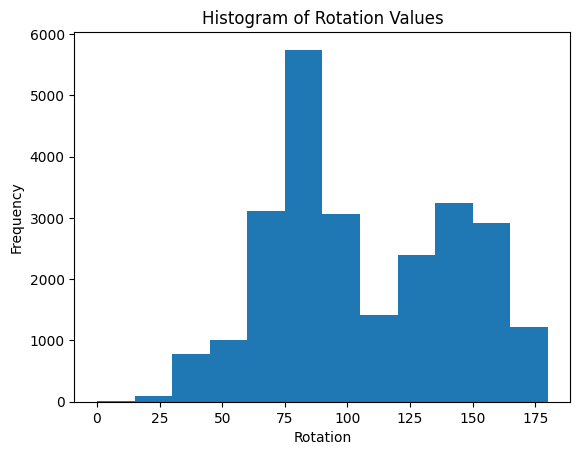

In [3]:
import matplotlib.pyplot as plt

bin_size = 15

bins = range(0, 181, bin_size)
plt.hist(data_in['Rotation'], bins=bins)
plt.xlabel('Rotation')
plt.ylabel('Frequency')
plt.title('Histogram of Rotation Values')
plt.show()

In [4]:
rotation_bins = pd.cut(data_in['Rotation'], bins=bins, include_lowest=True)
average_distance = data_in.groupby(rotation_bins)['Distance'].mean()
print(average_distance)

average_rotation = data_in.groupby(rotation_bins)['Rotation'].mean()
print(average_rotation)

Rotation
(-0.001, 15.0]     8.618212
(15.0, 30.0]       8.133197
(30.0, 45.0]       7.760132
(45.0, 60.0]       7.421842
(60.0, 75.0]       7.658187
(75.0, 90.0]       8.890740
(90.0, 105.0]      9.384808
(105.0, 120.0]    11.534332
(120.0, 135.0]    11.320537
(135.0, 150.0]    11.384886
(150.0, 165.0]    11.086031
(165.0, 180.0]    10.621315
Name: Distance, dtype: float64
Rotation
(-0.001, 15.0]      9.940157
(15.0, 30.0]       25.638565
(30.0, 45.0]       38.498535
(45.0, 60.0]       53.858028
(60.0, 75.0]       68.426138
(75.0, 90.0]       83.213194
(90.0, 105.0]      95.182801
(105.0, 120.0]    113.554301
(120.0, 135.0]    128.182830
(135.0, 150.0]    142.304373
(150.0, 165.0]    157.405111
(165.0, 180.0]    170.047612
Name: Rotation, dtype: float64


In [5]:
data_in[data_in.columns[1]]
print(len(cols))
alpha = 1
beta = 1
data2 = pd.DataFrame()

data2["Distance"] = data_in["Distance"]
data2["Rotation"] = data_in["Rotation"]
data2["Delta1"] = data_in["Delta1"]
data2["Delta2"] = data_in["Delta2"]
data2["Delta3"] = data_in["Delta3"]

for i in range(5, 147, 2):
  name =cols[i]+cols[i+1]
  name = name[:7]
  # print(name)
  # print(data['cols[i]'])
  data2[name] =   beta * data_in[cols[i]] + alpha * data_in[cols[i+1]]

# print(data2['ALE-404'])

 
data=data2
data=data.loc[:, abs(data).mean() > 0.5]
print(abs(data).mean().sort_values)
print(len(data.columns))

147
<bound method Series.sort_values of Distance      9.746371
Rotation    106.548913
Delta1       61.787213
Delta2       55.033347
Delta3       75.974486
ALE-258       0.568632
ALE-259       0.904483
ALE-262      11.311090
ALE-263       3.736048
ALE-265       0.571503
ALE-266       0.914885
ALE-267       1.133252
ALE-313       0.565096
ALE-342       2.530840
ALE-344       0.798280
ALE-348       1.280089
ALE-349       0.700651
ALE-352       2.929252
ALE-353       1.335719
ALE-356       1.851236
ALE-404       0.896323
ALE-407       2.150347
ALE-408       2.185578
ALE-411       3.693537
ALE-426       0.891767
ALE-430       3.134216
dtype: float64>
26


In [6]:
data.round(2).head().T.head(15).T

,Distance,Rotation,Delta1,Delta2,Delta3,ALE-258,ALE-259,ALE-262,ALE-263,ALE-265,ALE-266,ALE-267,ALE-313,ALE-342,ALE-344
0,12.04,130.83,-65.55,-69.67,75.56,-0.51,-1.03,-8.83,-3.35,0.17,-0.68,-0.96,-0.33,-3.28,-0.12
1,11.69,120.81,-61.06,-60.05,70.92,-0.54,-1.10,-12.05,-2.89,0.86,0.33,-1.34,-0.02,-3.35,-0.54
2,12.14,120.83,-65.34,-65.97,71.19,-0.78,-1.33,-12.95,-3.65,0.28,0.34,-1.62,0.17,-2.28,-0.43
3,11.63,115.28,-66.69,-67.14,68.38,-0.68,-0.87,-12.94,-4.87,0.57,-1.20,-1.73,0.08,-3.23,-0.09
4,11.80,126.82,-60.80,-54.65,89.31,-0.85,-1.70,-13.49,-3.64,1.08,-0.55,-0.99,-0.09,-4.27,-0.56


In [7]:
import collections

mean_values = {}
for i in range(5, len(data.columns), 1):
    mean_values[data.columns[i]] = data.iloc[:, i].mean()

print(mean_values)
sorted_mean_values = dict(sorted(mean_values.items(), key=lambda item: item[1]))
print(sorted_mean_values)
print("Top 10 mean values:")
for key, value in list(sorted_mean_values.items()):
    print(key, value)

{'ALE-258': -0.516851852, 'ALE-259': -0.7182844960000001, 'ALE-262': -7.599655711999999, 'ALE-263': -3.7331951359999995, 'ALE-265': 0.4827912040000001, 'ALE-266': -0.6650498359999999, 'ALE-267': -1.1101111399999999, 'ALE-313': -0.39847442800000005, 'ALE-342': -2.5220756040000003, 'ALE-344': -0.6958017200000001, 'ALE-348': -1.213722496, 'ALE-349': -0.516067364, 'ALE-352': -2.880695712, 'ALE-353': -1.2739954279999999, 'ALE-356': -1.784183008, 'ALE-404': -0.8452803, 'ALE-407': -2.0519912880000004, 'ALE-408': -2.166348208, 'ALE-411': -3.5917717039999992, 'ALE-426': -0.6785452919999999, 'ALE-430': -1.9939908000000002}
{'ALE-262': -7.599655711999999, 'ALE-263': -3.7331951359999995, 'ALE-411': -3.5917717039999992, 'ALE-352': -2.880695712, 'ALE-342': -2.5220756040000003, 'ALE-408': -2.166348208, 'ALE-407': -2.0519912880000004, 'ALE-430': -1.9939908000000002, 'ALE-356': -1.784183008, 'ALE-353': -1.2739954279999999, 'ALE-348': -1.213722496, 'ALE-267': -1.1101111399999999, 'ALE-404': -0.8452803, 

##Statistical Coefficient Calculation Based Methods

### Pearson's Correlation Coefficient

In [8]:
correlations = data.corr()
print(correlations)

          Distance  Rotation    Delta1    Delta2    Delta3   ALE-258  \
Distance  1.000000  0.615817 -0.203699 -0.155393 -0.244811 -0.335618   
Rotation  0.615817  1.000000  0.433676  0.080260  0.286797 -0.308719   
Delta1   -0.203699  0.433676  1.000000  0.115905  0.387193 -0.033714   
Delta2   -0.155393  0.080260  0.115905  1.000000  0.147622  0.249889   
Delta3   -0.244811  0.286797  0.387193  0.147622  1.000000 -0.096390   
ALE-258  -0.335618 -0.308719 -0.033714  0.249889 -0.096390  1.000000   
ALE-259  -0.242440 -0.408316 -0.275119  0.111477 -0.214637  0.587702   
ALE-262  -0.034125  0.116486  0.148002  0.297074  0.052757  0.759909   
ALE-263  -0.122838 -0.119975 -0.025571  0.010446  0.041691  0.277559   
ALE-265  -0.160586 -0.121346 -0.003876 -0.172887  0.170382 -0.592926   
ALE-266  -0.259925 -0.465737 -0.141197 -0.072142  0.056878  0.068641   
ALE-267  -0.105231 -0.021500  0.095551 -0.059819  0.312325 -0.187815   
ALE-313  -0.145016  0.159468  0.247354  0.081094  0.233061 -0.23

Distance    1.000000
ALE-408     0.637932
Rotation    0.615817
ALE-411     0.435290
ALE-404     0.404342
ALE-353     0.377415
ALE-352     0.175266
ALE-430     0.104476
ALE-348     0.060631
ALE-349     0.049388
Name: Distance, dtype: float64


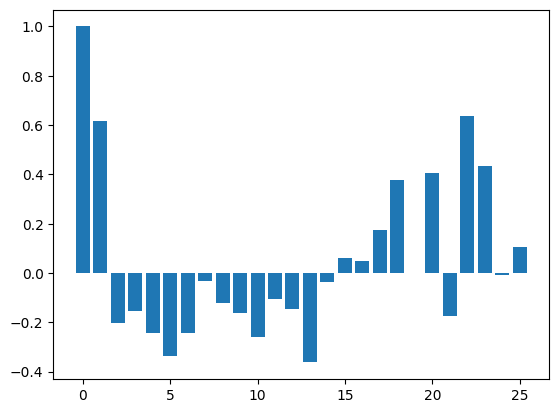

In [9]:
import matplotlib.pyplot as plt
print(correlations["Distance"].sort_values(ascending=False).head(10))
plt.bar([x for x in range(len(correlations["Distance"]))], correlations["Distance"])
plt.show()

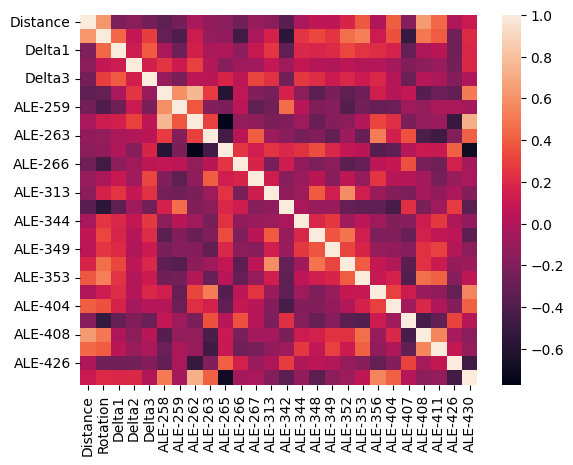

In [10]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlations)

plt.show()


###Spearman Correlation Coefficient

In [11]:
spearman_coeff = data.corr(method="spearman")
print(spearman_coeff)

          Distance  Rotation    Delta1    Delta2    Delta3   ALE-258  \
Distance  1.000000  0.634892 -0.208967 -0.215135 -0.191979 -0.271442   
Rotation  0.634892  1.000000  0.395095 -0.015867  0.285429 -0.323552   
Delta1   -0.208967  0.395095  1.000000  0.080084  0.376448 -0.040163   
Delta2   -0.215135 -0.015867  0.080084  1.000000  0.191901  0.209574   
Delta3   -0.191979  0.285429  0.376448  0.191901  1.000000 -0.065088   
ALE-258  -0.271442 -0.323552 -0.040163  0.209574 -0.065088  1.000000   
ALE-259  -0.182700 -0.387374 -0.312501  0.124925 -0.250617  0.496305   
ALE-262   0.031855  0.062340  0.093100  0.167440  0.105801  0.752851   
ALE-263  -0.095321 -0.165853 -0.011028 -0.032433  0.137863  0.300299   
ALE-265  -0.213774 -0.095721  0.030007 -0.036283  0.072902 -0.609934   
ALE-266  -0.228491 -0.472941 -0.177753 -0.048629 -0.088082  0.060446   
ALE-267  -0.137398 -0.029666  0.146011  0.005270  0.429889 -0.164483   
ALE-313  -0.068185  0.091266  0.119410 -0.016355  0.014669 -0.25

Distance    1.000000
Rotation    0.634892
ALE-408     0.564582
ALE-404     0.441163
ALE-411     0.413493
ALE-353     0.370672
ALE-352     0.234046
ALE-349     0.122331
ALE-430     0.077899
ALE-348     0.070156
Name: Distance, dtype: float64


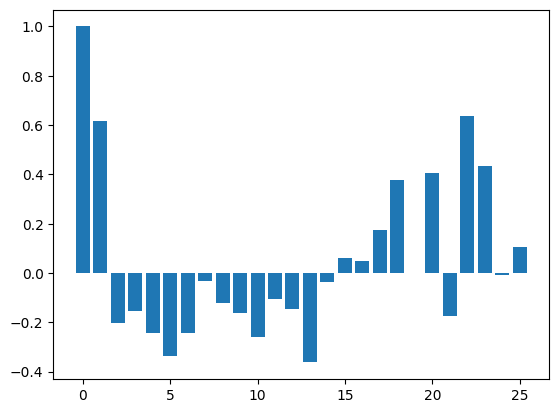

In [12]:
print(spearman_coeff["Distance"].sort_values(ascending=False).head(10))
plt.bar([x for x in range(len(correlations["Distance"]))], correlations["Distance"])
plt.show()

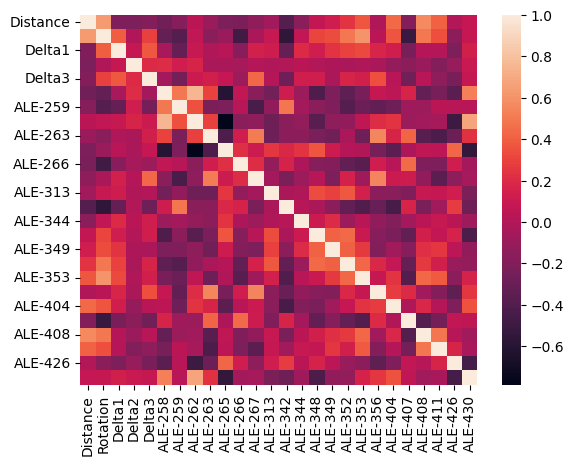

In [13]:
sns.heatmap(spearman_coeff)

plt.show()

## ML Methods

###Dataset Preparation

In [14]:
import sklearn
print(sklearn.__version__)

1.2.2


In [15]:
# test regression dataset
from sklearn.datasets import make_regression
from sklearn import preprocessing
# define dataset
# xa = data.values #returns a numpy array
# min_max_scaler = preprocessing.MinMaxScaler()
# x_scaled = min_max_scaler.fit_transform(xa)
# data = pd.DataFrame(x_scaled, columns=data.columns)
# print(data)
data1=data.drop('Distance', axis=1)
data1=data1.drop('Rotation', axis=1)
data1=data1.drop('Delta1', axis=1)
data1=data1.drop('Delta2', axis=1)
# data1=data1.drop('ALE-398', axis=1)
x=data1.drop('Delta3', axis=1)
y=data['Distance']
# summarize the dataset
print(x)
print(x.shape)
print(y)
print(y.shape)
# print(x['ALE-403']) #trp6.48
# print(x['ALE-356']) #ser5.46
# print(x['ALE-400']) #phe6.44
# print(x['ALE-420']) #leuecl3
# print(x['ALE-259']) #

       ALE-258  ALE-259  ALE-262  ALE-263  ALE-265  ALE-266  ALE-267  ALE-313  \
0      -0.5112  -1.0304  -8.8296  -3.3530   0.1698  -0.6806  -0.9575  -0.3329   
1      -0.5364  -1.0967 -12.0515  -2.8857   0.8556   0.3305  -1.3380  -0.0194   
2      -0.7826  -1.3296 -12.9496  -3.6451   0.2803   0.3368  -1.6178   0.1656   
3      -0.6842  -0.8670 -12.9432  -4.8728   0.5734  -1.1998  -1.7329   0.0784   
4      -0.8496  -1.7037 -13.4942  -3.6394   1.0845  -0.5496  -0.9922  -0.0855   
...        ...      ...      ...      ...      ...      ...      ...      ...   
24995   0.0000   0.3119  -1.1664  -3.0856   0.0811   0.0008  -1.7253  -0.6621   
24996   0.0060   0.2339   0.4957  -2.8920   0.1667  -0.0396  -0.9431  -0.9325   
24997   0.0040   0.3919  -0.5862  -3.6803   0.0623   0.0609  -1.3597  -1.0174   
24998  -0.0706   0.1483  -1.7092  -3.3583   0.5512  -0.0445  -0.3181  -0.5851   
24999   0.0350  -0.4805  -5.2177  -3.1972   0.3027   0.0552  -1.8998  -0.3642   

       ALE-342  ALE-344  ..

In [16]:
print(x['ALE-404']) #trp6.48

0       -0.1173
1        0.1806
2       -0.0532
3       -0.0371
4       -0.2368
          ...  
24995   -2.7025
24996   -2.0507
24997   -1.5844
24998   -1.9608
24999   -1.9439
Name: ALE-404, Length: 25000, dtype: float64


In [17]:
print(x['ALE-356']) #ser5.46

0       -5.8339
1       -3.9480
2       -5.8192
3       -6.0423
4       -5.3904
          ...  
24995   -0.7809
24996   -1.8507
24997   -2.1789
24998   -1.0300
24999   -1.8101
Name: ALE-356, Length: 25000, dtype: float64


In [18]:
print(x['ALE-430']) #asn7.39

0       -7.1139
1       -2.1024
2       -0.0567
3       -0.7429
4       -2.0934
          ...  
24995    0.0962
24996   -0.0095
24997    0.0001
24998   -0.0042
24999    0.0731
Name: ALE-430, Length: 25000, dtype: float64


In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)

In [20]:
x[x.isna().any(axis=1)]

,ALE-258,ALE-259,ALE-262,ALE-263,ALE-265,ALE-266,ALE-267,ALE-313,ALE-342,ALE-344,...,ALE-349,ALE-352,ALE-353,ALE-356,ALE-404,ALE-407,ALE-408,ALE-411,ALE-426,ALE-430


###Linear Regression

<ipython-input-21-5eb5e261ab53>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  importance_scores = importance_scores.append(pd.DataFrame({
<ipython-input-21-5eb5e261ab53>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  importance_scores = importance_scores.append(pd.DataFrame({
<ipython-input-21-5eb5e261ab53>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  importance_scores = importance_scores.append(pd.DataFrame({
<ipython-input-21-5eb5e261ab53>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  importance_scores = importance_scores.append(pd.DataFrame({
<ipython-input-21-5eb5e261ab53>:29: FutureWarning: The frame.append method i

    feature  importance
17  ALE-408    0.618623
15  ALE-404    0.448216
10  ALE-348    0.171748
16  ALE-407    0.159626
3   ALE-263    0.102786
20  ALE-430    0.097607
18  ALE-411    0.093771
1   ALE-259    0.088037
19  ALE-426    0.086239
13  ALE-353    0.045244


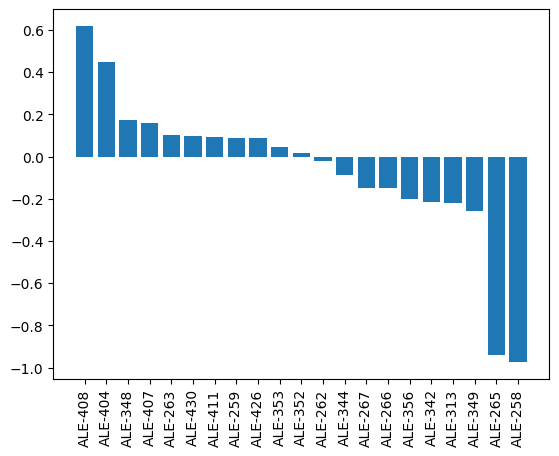

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# define the model
model = LinearRegression()

# define 10-fold cross-validation
cv = KFold(n_splits=10, random_state=1, shuffle=True)

# initialize feature importance scores
importance_scores = pd.DataFrame(columns=['feature', 'importance'])

# perform 10-fold cross-validation
for train_index, test_index in cv.split(x):
    # get training and testing data
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # fit the model on training data
    model.fit(x_train, y_train)

    # get feature importance scores
    importance = model.coef_
    # append feature importance scores to dataframe
    importance_scores = importance_scores.append(pd.DataFrame({
        'feature': x_train.columns,
        'importance': importance
    }), ignore_index=True)

# calculate average feature importance scores across 10 models
avg_importance_scores = importance_scores.groupby('feature')['importance'].mean().reset_index()

# sort feature importance scores in descending order
avg_importance_scores = avg_importance_scores.sort_values(by='importance', ascending=False)

lr_scores = avg_importance_scores
# print feature importance scores
print(avg_importance_scores[:10])

# plot feature importance scores
plt.bar(avg_importance_scores['feature'], avg_importance_scores['importance'])
plt.xticks(rotation=90)
plt.show()


## Decision Tree Cart

<ipython-input-22-95d5f3516424>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  importance_scores = importance_scores.append(pd.DataFrame({
<ipython-input-22-95d5f3516424>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  importance_scores = importance_scores.append(pd.DataFrame({
<ipython-input-22-95d5f3516424>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  importance_scores = importance_scores.append(pd.DataFrame({
<ipython-input-22-95d5f3516424>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  importance_scores = importance_scores.append(pd.DataFrame({
<ipython-input-22-95d5f3516424>:30: FutureWarning: The frame.append method i

    feature  importance
17  ALE-408    0.417826
15  ALE-404    0.143809
1   ALE-259    0.095101
2   ALE-262    0.081414
20  ALE-430    0.040019
14  ALE-356    0.031304
16  ALE-407    0.025526
12  ALE-352    0.025048
0   ALE-258    0.023590
8   ALE-342    0.020288


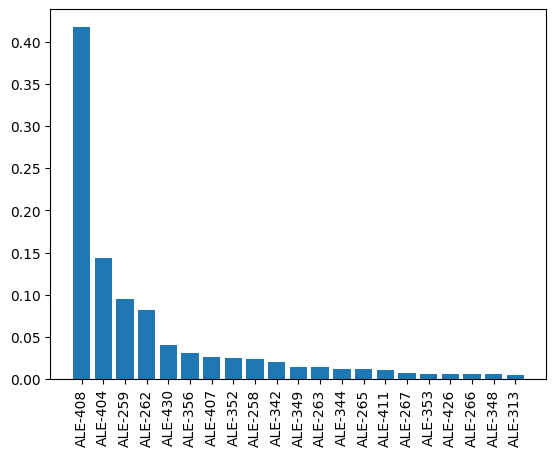

In [22]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# define the model
model = DecisionTreeRegressor()

# define 10-fold cross-validation
cv = KFold(n_splits=10, random_state=1, shuffle=True)

# initialize feature importance scores
importance_scores = pd.DataFrame(columns=['feature', 'importance'])

# perform 10-fold cross-validation
for train_index, test_index in cv.split(x):
    # get training and testing data
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # fit the model on training data
    model.fit(x_train, y_train)

    # get feature importance scores
    importance = model.feature_importances_

    # append feature importance scores to dataframe
    importance_scores = importance_scores.append(pd.DataFrame({
        'feature': x_train.columns,
        'importance': importance
    }), ignore_index=True)

# calculate average feature importance scores across 10 models
avg_importance_scores = importance_scores.groupby('feature')['importance'].mean().reset_index()

# sort feature importance scores in descending order
avg_importance_scores = avg_importance_scores.sort_values(by='importance', ascending=False)
ds_scores = avg_importance_scores
# print feature importance scores
print(avg_importance_scores[:10])

# plot feature importance scores
plt.bar(avg_importance_scores['feature'], avg_importance_scores['importance'])
plt.xticks(rotation=90)
plt.show()


###Random Forest

<ipython-input-23-871a08953549>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  importance_scores = importance_scores.append(pd.DataFrame({
<ipython-input-23-871a08953549>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  importance_scores = importance_scores.append(pd.DataFrame({
<ipython-input-23-871a08953549>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  importance_scores = importance_scores.append(pd.DataFrame({
<ipython-input-23-871a08953549>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  importance_scores = importance_scores.append(pd.DataFrame({
<ipython-input-23-871a08953549>:25: FutureWarning: The frame.append method i

    feature  importance
17  ALE-408    0.418529
15  ALE-404    0.129332
1   ALE-259    0.085467
2   ALE-262    0.069948
20  ALE-430    0.059348
14  ALE-356    0.036119
0   ALE-258    0.029745
16  ALE-407    0.028562
8   ALE-342    0.022215
12  ALE-352    0.020428


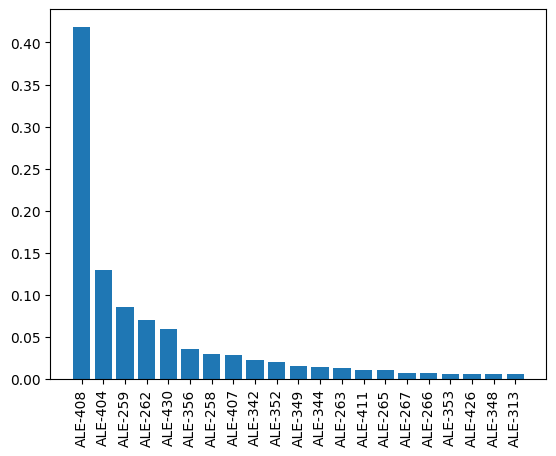

In [23]:
from sklearn.ensemble import RandomForestRegressor

# define the model
model = RandomForestRegressor()

# define 10-fold cross-validation
cv = KFold(n_splits=10, random_state=1, shuffle=True)

# initialize feature importance scores
importance_scores = pd.DataFrame(columns=['feature', 'importance'])

# perform 10-fold cross-validation
for train_index, test_index in cv.split(x):
    # get training and testing data
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # fit the model on training data
    model.fit(x_train, y_train)

    # get feature importance scores
    importance = model.feature_importances_

    # append feature importance scores to dataframe
    importance_scores = importance_scores.append(pd.DataFrame({
        'feature': x_train.columns,
        'importance': importance
    }), ignore_index=True)

# calculate average feature importance scores across 10 models
avg_importance_scores = importance_scores.groupby('feature')['importance'].mean().reset_index()

# sort feature importance scores in descending order
avg_importance_scores = avg_importance_scores.sort_values(by='importance', ascending=False)
rf_scores = avg_importance_scores
# print feature importance scores
print(avg_importance_scores[:10])

# plot feature importance scores
plt.bar(avg_importance_scores['feature'], avg_importance_scores['importance'])
plt.xticks(rotation=90)
plt.show()


###XGBOOST

<ipython-input-24-165469a00c4e>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  importance_scores = importance_scores.append(pd.DataFrame({
<ipython-input-24-165469a00c4e>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  importance_scores = importance_scores.append(pd.DataFrame({
<ipython-input-24-165469a00c4e>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  importance_scores = importance_scores.append(pd.DataFrame({
<ipython-input-24-165469a00c4e>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  importance_scores = importance_scores.append(pd.DataFrame({
<ipython-input-24-165469a00c4e>:25: FutureWarning: The frame.append method i

    feature  importance
17  ALE-408    0.442233
20  ALE-430    0.092368
15  ALE-404    0.091559
1   ALE-259    0.060977
2   ALE-262    0.056464
14  ALE-356    0.043889
16  ALE-407    0.040649
11  ALE-349    0.026064
8   ALE-342    0.026063
12  ALE-352    0.021748


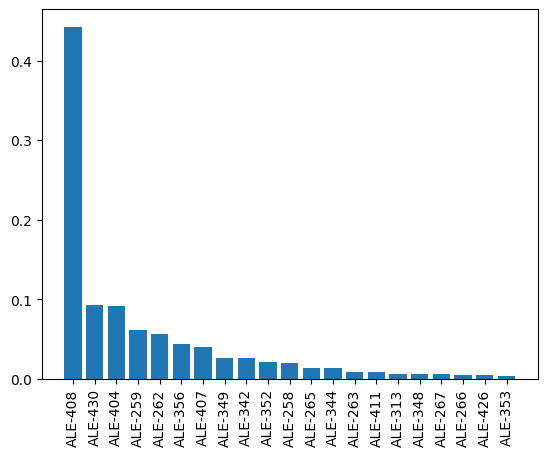

In [24]:
from xgboost.sklearn import XGBRegressor

# define the model
model = XGBRegressor()

# define 10-fold cross-validation
cv = KFold(n_splits=10, random_state=1, shuffle=True)

# initialize feature importance scores
importance_scores = pd.DataFrame(columns=['feature', 'importance'])

# perform 10-fold cross-validation
for train_index, test_index in cv.split(x):
    # get training and testing data
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # fit the model on training data
    model.fit(x_train, y_train)

    # get feature importance scores
    importance = model.feature_importances_

    # append feature importance scores to dataframe
    importance_scores = importance_scores.append(pd.DataFrame({
        'feature': x_train.columns,
        'importance': importance
    }), ignore_index=True)

# calculate average feature importance scores across 10 models
avg_importance_scores = importance_scores.groupby('feature')['importance'].mean().reset_index()

# sort feature importance scores in descending order
avg_importance_scores = avg_importance_scores.sort_values(by='importance', ascending=False)
xgb_scores = avg_importance_scores
# print feature importance scores
print(avg_importance_scores[:10])

# plot feature importance scores
plt.bar(avg_importance_scores['feature'], avg_importance_scores['importance'])
plt.xticks(rotation=90)
plt.show()


###KNeighbours

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance
import numpy as np

# define the model
model = KNeighborsRegressor()

# define 10-fold cross-validation
cv = KFold(n_splits=10, random_state=1, shuffle=True)

# initialize feature importance scores
importance_scores = pd.DataFrame(columns=['feature', 'importance'])

# perform 10-fold cross-validation
for train_index, test_index in cv.split(x):
    # get training and testing data
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # fit the model on training data
    model.fit(x_train, y_train)

    # get feature importance scores using permutation importance
    result = permutation_importance(model, x_test, y_test, n_repeats=10, random_state=1)
    importance = result.importances_mean

    # append feature importance scores to dataframe
    importance_scores = importance_scores.append(pd.DataFrame({
        'feature': x_train.columns,
        'importance': importance
    }), ignore_index=True)

# calculate average feature importance scores across 10 models
avg_importance_scores = importance_scores.groupby('feature')['importance'].mean().reset_index()

# sort feature importance scores in descending order
avg_importance_scores = avg_importance_scores.sort_values(by='importance', ascending=False)
knn_scores = avg_importance_scores
# print feature importance scores
print(avg_importance_scores[:10])

# plot feature importance scores
plt.bar(avg_importance_scores['feature'], avg_importance_scores['importance'])
plt.xticks(rotation=90)
plt.show()


In [ ]:
total_avg_score = lr_score + ds_score